## E. Coli sequence k-mer analysis
This notebook explores the k-mer distribution of the E. coli genome

In [35]:
from collections import Counter

# parse sequence downloaded from Ensembl
with open("Escherichia_coli_gca_000731455.V1.dna.toplevel.fa", "r") as ecoli_genome:
    sequence = "".join(l.strip() for l in ecoli_genome if not l.startswith(">"))
print(sequence[:50] + "...")

TGTGGGGTCTCCCCATGCGAGAGTAGGGAACTGCCAGGCATCAAATCAAG...


In [36]:
# k-mer counting function
def kmer_counts(seq, k):
    counts = Counter()
    for i in range(0, len(seq)-k+1):
        counts[seq[i:(i+k)]] += 1
    return counts

assert kmer_counts("ATCAGTC", 3) == Counter({'ATC':1, 'TCA':1, 'CAG': 1, 'AGT':1, 'GTC':1})

In [37]:
# compute number of distinct and unique k-mers over a grid of values for k
import sys 

grid = range(10, 31)
n_kmers = [0 for _ in grid]
unique_kmers = [0 for _ in grid]

for i, k in enumerate(grid):
    sys.stdout.write('\rComputing stats for k={0}...'.format(k))
    sys.stdout.flush()
    counts = kmer_counts(sequence, k)
    n_kmers[i] = len(counts)
    unique_kmers[i] = len([v for v in counts.values() if v == 1])
print('\nDone')

Computing stats for k=30...
Done


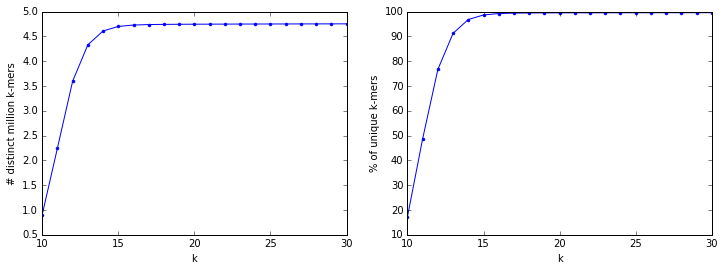

In [38]:
# plot results
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,4)

plt.subplot(121)
plt.plot(grid, [n/1e6 for n in n_kmers], '.-')
plt.xlabel('k')
plt.ylabel('# distinct million k-mers')
plt.subplot(122)
plt.plot(grid, [a/b*100 for a,b in zip(unique_kmers, n_kmers)], '.-')
plt.xlabel('k')
plt.ylabel('% of unique k-mers')
plt.show()

In [39]:
k_val = 20
k_index = grid.index(k_val)
nk = n_kmers[k_index]
ratio = unique_kmers[k_index] / nk * 100
print("k={}: {} distinct k-mers, {}% unique".format(k_val, nk, ratio))

k=20: 4745899 distinct k-mers, 99.49708158559632% unique
